<a href="https://colab.research.google.com/github/singwang-cn/The_first_pattern_recognition/blob/master/ex8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import load_diabetes
from sklearn.model_selection import LeaveOneOut
from sklearn import svm

# Implementation of SVM with RBF kernel function
The optimal parameters alpha are solved by sciPy.


In [79]:
class support_vector_machine():
  def __init__(self, kernel='rbf', sigma=4, c=10):
    self.kernel = kernel
    self.sigma = sigma
    self.c = c
    self.w = None
    self.b = None
    self.l = None
    self.t = None
    self.H = None
    self.alpha = None
    self.cons = (
      {'type': 'eq', 'fun': lambda x: np.dot(x, self.t)}
    )
  def obj_func(self, alpha):
    return 1/2*np.dot(np.dot(alpha, self.H), alpha)-np.sum(alpha)
  def fit(self, X, Y):
    n, d = X.shape
    self.l = X
    self.t = np.where(Y==0, -1, 1)
    self.H = np.zeros((n, n))
    for i in range(n):
      for j in range(n):
        self.H[i][j] = self.t[i]*self.t[j]*self.rbf_kernel(X[i], X[j])
    self.alpha = minimize(self.obj_func, 
                        x0=np.random.rand(n), bounds=((0, self.c),)*n,
                        constraints=self.cons, method="SLSQP").x
  def predict(self, x):
    n = self.alpha.shape[0]
    result = np.zeros(n)
    for i in range(n):
      result[i] = self.alpha[i]*self.t[i]*self.rbf_kernel(self.l[i], x)
    if np.sum(result) > 0:
      return 1
    else:
      return 0
  def rbf_kernel(self, u, v):
    norm = np.linalg.norm(u-v, ord=2)
    return np.exp(-1/(2*self.sigma)*(norm**2))
    

# Pima Indians Diabetes Dataset
The dataset is divided into features and labels, and all of the features are normalized.

In [98]:
'''
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_label = np.array(pima['Outcome'].tolist())
pima_nolabel = pima[['Glucose', 'BMI']]
pima_data = ((pima_nolabel-pima_nolabel.mean())/pima_nolabel.std()).values
'''

In [106]:
diabetes = load_diabetes()
pima_nolabel = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)[['bmi', 's6']]
pima_data = ((pima_nolabel-pima_nolabel.mean())/pima_nolabel.std()).values
pima_target = pd.DataFrame(data=diabetes.target).values.flatten()
pima_label = np.where(pima_target < 140, 0, 1 )

# Computing Training Error Rate
The data used here are from index 0 to index 199 (200 in total).

In [109]:
error_rate = np.zeros((4, 5))
sigma_list = [0.2, 0.4, 0.8, 4.0]
for i in range(4):
  for j in range(5):
    mysvm = support_vector_machine(kernel='rbf', sigma=sigma_list[i], c=10**j)
    mysvm.fit(pima_data[0:199], pima_label[0:199])
    for k in range(200):
      if mysvm.predict(pima_data[k]) != pima_label[k]:
        error_rate[i][j] += 1
    error_rate[i][j] /= 200

# Computing Test Error Rate
The data for training are from index 0 to index 199 (200 in total).

The validation data are from index 200 to index 499 (300 in total).


In [111]:
gen_error_rate = np.zeros((4, 5))
for i in range(4):
  for j in range(5):
    mysvm2 = support_vector_machine(kernel='rbf', sigma=sigma_list[i], c=10**j)
    mysvm2.fit(pima_data[0:199], pima_label[0:199])
    for k in range(242):
      if mysvm2.predict(pima_data[k+200]) != pima_label[k+200]:
        gen_error_rate[i][j] += 1
    gen_error_rate[i][j] /= 242


# Visualization of Result
We can see the error rates in the following graph when sigma is 0.2 0.4 0.8 4.0 and the constant C is 1 to 10000.

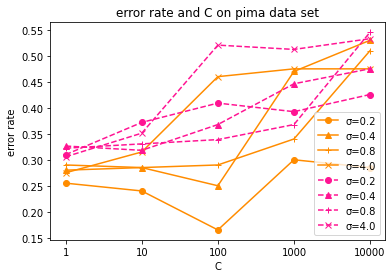

In [113]:
plt.figure("error rate and C on pima data set")
plt.title("error rate and C on pima data set")
plt.plot([1,2,3,4,5], error_rate[0], marker='o', color='darkorange', label='σ=0.2')
plt.plot([1,2,3,4,5], error_rate[1], marker='^', color='darkorange', label='σ=0.4')
plt.plot([1,2,3,4,5], error_rate[2], marker='+', color='darkorange', label='σ=0.8')
plt.plot([1,2,3,4,5], error_rate[3], marker='x', color='darkorange', label='σ=4.0')
plt.plot([1,2,3,4,5], gen_error_rate[0], marker='o', color='deeppink', label='σ=0.2', linestyle='--')
plt.plot([1,2,3,4,5], gen_error_rate[1], marker='^', color='deeppink', label='σ=0.4', linestyle='--')
plt.plot([1,2,3,4,5], gen_error_rate[2], marker='+', color='deeppink', label='σ=0.8', linestyle='--')
plt.plot([1,2,3,4,5], gen_error_rate[3], marker='x', color='deeppink', label='σ=4.0', linestyle='--')
plt.xlabel('C')
plt.xticks([1, 2, 3, 4, 5], ['1', '10', '100', '1000', '10000'])
plt.ylabel('error rate')
plt.legend()